This jp notebooks help to analyze metrics from different model training

This jp notebook analyzes metrics from multiple model evaluations to address questions below:

1. Which one is better for wakeword?:
  
   Long vs Short

2. What is the significance of first word in wake phrase? Which one is better? : 

  "Fourthbrain" vs "Hey Fourthbrain" vs "Hello Fourthbrain"

# Load libraries

In [11]:
from google.colab import drive
import pandas as pd
import os
import librosa
import warnings
import numpy as np
import glob
from pathlib import Path
from tensorflow import keras
import matplotlib.pyplot as plt


In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
os.chdir('/content/drive/MyDrive/**/')

# Record model training foldes

## Long vs Short

In [14]:
folders = {
        'fourthbrain' : 'fourthbrain_2021_08_31-01_06_02_AM',
        'seven' : 'seven_2021_08_31-01_34_13_AM',
        'go' : 'go_2021_08_31-02_02_34_AM',
        'cat' : 'cat_2021_08_31-02_32_33_AM',
        'happy' : 'happy_2021_08_31-03_02_48_AM',
        'marvin' : 'marvin_2021_08_31-03_32_42_AM',
        'house' : 'house_2021_08_31-04_02_54_AM',
        'sheila': 'sheila_2021_08_31-04_33_41_AM',
        'six': 'six_2021_08_31-05_04_56_AM',
        'heyfourthbrain' : 'heyfourthbrain_2021_08_31-05_37_52_AM',
        'no' : 'no_2021_08_31-06_03_30_AM',
        'wow' : 'wow_2021_08_31-06_32_28_AM',
        } 

In [15]:
metrics = {}

for key in folders.keys():     
    metric = { 'folder': folders[key],
                'mode1l': os.path.join(os.getcwd(),folders[key],'model1',key+'_model1_results.txt'),
                'mode12': os.path.join(os.getcwd(),folders[key],'model2',key+'_model2_results.txt'),
                'mode13': os.path.join(os.getcwd(),folders[key],'model3',key+'_model3_results.txt'),
                'fp_long': os.path.join(os.getcwd(),folders[key],'comparison_longnegative_clip.txt'),
                'fp_mixed': os.path.join(os.getcwd(),folders[key],'comparison_fp_mixed_clip.txt'),
                'fp_clips': os.path.join(os.getcwd(),folders[key],'comparison_fp_shortnegative_clips.txt'),
                'mixed_wav': os.path.join(os.getcwd(),folders[key],'long_mixed_test.wav'),
                'neg_wav': os.path.join(os.getcwd(),folders[key],'long_neg_test.wav')
              }
    metrics[key] = metric


In [17]:
df_list = []

for key in metrics:
    df_clips = pd.read_table(metrics[key]['fp_clips'],sep='\t')
    df_long = pd.read_table(metrics[key]['fp_long'],sep='\t')

    df = pd.read_table(metrics[key]['mode1l'],sep='\t')
    df['wake_word'] = key 
    df['model_type'] = 'custom_cnn' 
    df['FP_Rate(%)_clips'] = df_clips[df_clips['Model'] == 'Model1']['FP_Rate(%)'].values[0] 
    df['FP_Rate(%)_stream'] = df_long[df_long['Model'] == 'Model1']['FP_Rate(%)'].values[0] 
    df_list.append(df)
    
    df = pd.read_table(metrics[key]['mode12'],sep='\t')
    df['wake_word'] = key 
    df['model_type'] = 'ResNet8' 
    df['FP_Rate(%)_clips'] = df_clips[df_clips['Model'] == 'Model2']['FP_Rate(%)'].values[0] 
    df['FP_Rate(%)_stream'] = df_long[df_long['Model'] == 'Model2']['FP_Rate(%)'].values[0] 
    df_list.append(df)


    df = pd.read_table(metrics[key]['mode13'],sep='\t')
    df['wake_word'] = key 
    df['model_type'] = 'AlexNet' 
    df['FP_Rate(%)_clips'] = df_clips[df_clips['Model'] == 'Model3']['FP_Rate(%)'].values[0] 
    df['FP_Rate(%)_stream'] = df_long[df_long['Model'] == 'Model3']['FP_Rate(%)'].values[0] 
    df_list.append(df)


df = pd.concat(df_list)
df['length'] = df['wake_word'].str.len()

df = df.reset_index()


cols = ['wake_word','model_type','FP_Rate(%)_stream','Accuracy','F1score','Precision','Recall','FP_Rate(%)_clips','length']

df = df[cols]
#df




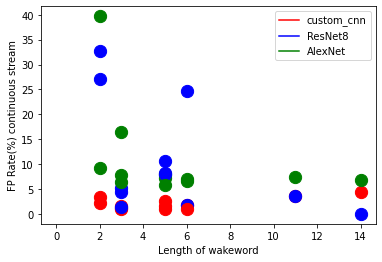

In [27]:
# Analyze all models for 12 wakewords 

colors = ['red','blue','green']

for i in range(df.shape[0]):

  plt.scatter(df.iloc[i]['length'],df.iloc[i]['FP_Rate(%)_stream'], color=colors[i%3],s=150)

plt.xlabel('Length of wakeword')
plt.ylabel('FP Rate(%) continuous stream')

plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='red',label='custom_cnn')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='blue',label='ResNet8')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='green',label='AlexNet')

plt.legend(loc = "upper right")
figname = '/content/drive/MyDrive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/LongvsShort_wakeword.png'
plt.savefig(figname)


In [20]:
# Select best model for each wakeword
df_short = df.sort_values(['FP_Rate(%)_stream'],ascending=True).groupby('wake_word').head(1)
df_short = df_short.reset_index()
#df_short

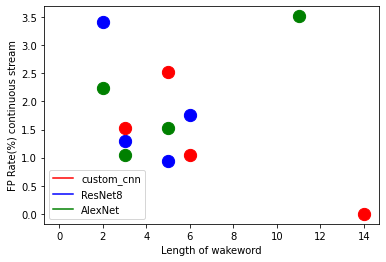

In [28]:
colors = ['red','blue','green']

for i in range(df_short.shape[0]):

  plt.scatter(df_short.iloc[i]['length'],df_short.iloc[i]['FP_Rate(%)_stream'], color=colors[i%3],s=150)

plt.xlabel('Length of wakeword')
plt.ylabel('FP Rate(%) continuous stream')

plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='red',label='custom_cnn')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='blue',label='ResNet8')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='green',label='AlexNet')

plt.legend(loc = "lower left")

figname = '/content/drive/MyDrive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/LongvsShort_wakeword_bestmodels.png'
plt.savefig(figname)



## " " vs Hey vs Hello

In [22]:
fb = '/content/drive/My Drive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/fourthbrain_2021_09_10-04_04_38_PM/all_metrics_path.txt'
hfb = '/content/drive/My Drive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/heyfourthbrain_2021_09_10-07_16_53_AM/all_metrics_path.txt'
hellofb = '/content/drive/My Drive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/hellofourthbrain_2021_09_11-07_35_19_AM/all_metrics_path.txt'

df_fb= pd.read_table(fb,sep='\t')
df_hfb = pd.read_table(hfb,sep='\t')
df_hellofb = pd.read_table(hellofb,sep='\t')

In [23]:
pd.set_option('max_columns', None)

print (df_fb)
print (df_hfb)
print (df_hellofb)

        Model  FP_Rate(%)_stream  Accuracy   F1score  Precision    Recall  \
0  custom_cnn           3.555556  0.866667  0.917808   0.893333  0.943662   
1     ResNet8           2.944444  0.977778  0.985915   0.985915  0.985915   
2     AlexNet           5.722222  0.922222  0.950355   0.957143  0.943662   

   Length(min)_stream  FP_Rate(%)_clips  NumClips     lr  num_epoch  num_neg  \
0                15.0              2.00       400  0.001        200      450   
1                15.0              3.50       400  0.001        200      450   
2                15.0              2.25       400  0.001        200      450   

   num_pos  
0      144  
1      144  
2      144  
        Model  FP_Rate(%)_stream  Accuracy   F1score  Precision    Recall  \
0  custom_cnn           4.222222  0.910112  0.943662   0.943662  0.943662   
1     ResNet8           0.000000  0.797753  0.887500   0.797753  1.000000   
2     AlexNet           4.222222  0.966292  0.978723   0.985714  0.971831   

   Length

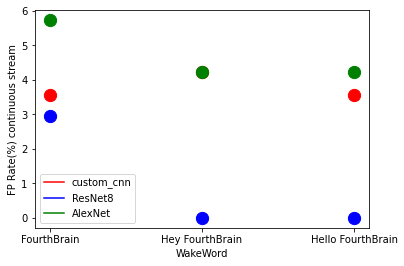

In [29]:
colors = ['red','blue','green']

for i in range(df_hfb.shape[0]):

  plt.scatter('FourthBrain',df_fb.iloc[i]['FP_Rate(%)_stream'], color=colors[i%3],s=150)
  plt.scatter('Hey FourthBrain',df_hfb.iloc[i]['FP_Rate(%)_stream'], color=colors[i%3],s=150)
  plt.scatter('Hello FourthBrain',df_hellofb.iloc[i]['FP_Rate(%)_stream'], color=colors[i%3],s=150)

plt.xlabel('WakeWord')
plt.ylabel('FP Rate(%) continuous stream')

plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='red',label='custom_cnn')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='blue',label='ResNet8')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='green',label='AlexNet')

plt.legend(loc = "lower left")

figname = '/content/drive/MyDrive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/FB_HeyFB_HelloFB_fprate.png'
plt.savefig(figname)


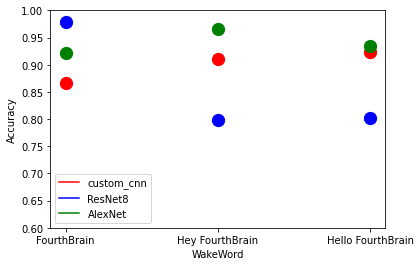

In [30]:
for i in range(df_hfb.shape[0]):

  plt.scatter('FourthBrain',df_fb.iloc[i]['Accuracy'], color=colors[i%3],s=150)
  plt.scatter('Hey FourthBrain',df_hfb.iloc[i]['Accuracy'], color=colors[i%3],s=150)
  plt.scatter('Hello FourthBrain',df_hellofb.iloc[i]['Accuracy'], color=colors[i%3],s=150)

plt.xlabel('WakeWord')
plt.ylabel('Accuracy')

plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='red',label='custom_cnn')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='blue',label='ResNet8')
plt.plot(np.arange(0,1,2),np.arange(0,1,2),color='green',label='AlexNet')
plt.ylim([0.6, 1.0])

plt.legend(loc = "lower left")


figname = '/content/drive/MyDrive/SpotifyFourthBrainPartnerProject/custom_wakeword_engine/FB_HeyFB_HelloFB_accuracy.png'
plt.savefig(figname)